In [1]:
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sparse
import xarray as xr

In [2]:
# some nice plotting settings
xr.set_options(cmap_sequential=mpl.cm.YlGn, keep_attrs=True)
plt.rcParams["figure.dpi"] = 120
cbar_kwargs = {"orientation": "horizontal", "shrink": 0.8, "aspect": 30}


def setup_axes():
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    return ax

In [3]:
pft_constants = xr.open_dataset("/cluster/shared/noresm/inputdata/lnd/clm2/paramdata/clm5_params.c171117.nc")
pftnames = pft_constants.pftname
data = xr.open_dataset("/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_1008_withrestart/lnd/hist/NSSP534frc2esm_f19_tn14_1008_withrestart.clm2.h1.2080-01.nc",decode_times=True,chunks={"time": 100},)
data

<xarray.Dataset>
Dimensions:             (levgrnd: 25, levlak: 10, levdcmp: 25, time: 1,
                         hist_interval: 2, lon: 144, lat: 96, gridcell: 5701,
                         landunit: 17795, column: 142368, pft: 222182)
Coordinates:
  * levgrnd             (levgrnd) float64 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak              (levlak) float64 0.05 0.6 2.1 4.6 ... 25.6 34.33 44.77
  * levdcmp             (levdcmp) float64 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * time                (time) object 2080-02-01 00:00:00
  * lon                 (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval, gridcell, landunit, column, pft
Data variables: (12/87)
    mcdate              (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds         (time, hist_interval) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...                  ...
    TOTECOSYSN          (time, column) float64 dask.array<chunksize=(1, 142368), meta=np.ndarray>
    TOTSOMC             (time, column) float64 dask.array<chunksize=(1, 142368), meta=np.ndarray>
    TOTSOMN             (time, column) float64 dask.array<chunksize=(1, 142368), meta=np.ndarray>
    TOTVEGC             (time, pft) float64 dask.array<chunksize=(1, 222182), meta=np.ndarray>
    TOTVEGN             (time, pft) float64 dask.array<chunksize=(1, 222182), meta=np.ndarray>
    WOODC               (time, pft) float64 dask.array<chunksize=(1, 222182), meta=np.ndarray>
Attributes: (12/102)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 08/10/23 16:04:00
    source:                                    Community Land Model CLM4.0
    hostname:                                  betzy
    ...                                        ...
    cft_irrigated_tropical_corn:               62
    cft_tropical_soybean:                      63
    cft_irrigated_tropical_soybean:            64
    time_period_freq:                          month_1
    Time_constant_3Dvars_filename:             ./NSSP534frc2esm_f19_tn14_1008...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

In [18]:
data

<xarray.Dataset>
Dimensions:             (levgrnd: 25, levlak: 10, levdcmp: 25, time: 1,
                         hist_interval: 2, lon: 144, lat: 96, gridcell: 5701,
                         landunit: 17795, column: 142368, pft: 222182)
Coordinates:
  * levgrnd             (levgrnd) float64 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak              (levlak) float64 0.05 0.6 2.1 4.6 ... 25.6 34.33 44.77
  * levdcmp             (levdcmp) float64 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * time                (time) object 2080-02-01 00:00:00
  * lon                 (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval, gridcell, landunit, column, pft
Data variables: (12/87)
    mcdate              (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds         (time, hist_interval) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...                  ...
    TOTECOSYSN          (time, column) float64 dask.array<chunksize=(1, 142368), meta=np.ndarray>
    TOTSOMC             (time, column) float64 dask.array<chunksize=(1, 142368), meta=np.ndarray>
    TOTSOMN             (time, column) float64 dask.array<chunksize=(1, 142368), meta=np.ndarray>
    TOTVEGC             (time, pft) float64 dask.array<chunksize=(1, 222182), meta=np.ndarray>
    TOTVEGN             (time, pft) float64 dask.array<chunksize=(1, 222182), meta=np.ndarray>
    WOODC               (time, pft) float64 dask.array<chunksize=(1, 222182), meta=np.ndarray>
Attributes: (12/102)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 08/10/23 16:04:00
    source:                                    Community Land Model CLM4.0
    hostname:                                  betzy
    ...                                        ...
    cft_irrigated_tropical_corn:               62
    cft_tropical_soybean:                      63
    cft_irrigated_tropical_soybean:            64
    time_period_freq:                          month_1
    Time_constant_3Dvars_filename:             ./NSSP534frc2esm_f19_tn14_1008...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

In [4]:
def to_sparse(data, vegtype, jxy, ixy, shape):
    """
    Takes an input numpy array and converts it to a sparse array.

    Parameters
    ----------
    data: numpy.ndarray
        1D or 2D Data stored in compressed form.
    vegtype: numpy.ndarray

    jxy: numpy.ndarray
        Latitude index
    ixy: numpy.ndarray
        Longitude index
    shape: tuple
        Shape provided as sizes of (vegtype, jxy, ixy) in uncompressed
        form.

    Returns
    -------
    sparse.COO
        Sparse nD array
    """
    import sparse

    # This constructs a list of coordinate locations at which data exists
    # it works for arbitrary number of dimensions but assumes that the last dimension
    # is the "stacked" dimension i.e. "pft"
    if data.ndim == 1:
        coords = np.stack([vegtype, jxy - 1, ixy - 1], axis=0)
    elif data.ndim == 2:
        # generate some repeated time indexes
        # [0 0 0 ... 1 1 1... ]
        itime = np.repeat(np.arange(data.shape[0]), data.shape[1])
        # expand vegtype and friends for all time instants
        # by sequentially concatenating each array for each time instants
        tostack = [np.concatenate([array] * data.shape[0]) for array in [vegtype, jxy - 1, ixy - 1]]
        coords = np.stack([itime] + tostack, axis=0)
    else:
        raise NotImplementedError

    return sparse.COO(
        coords=coords,
        data=data.ravel(),
        shape=data.shape[:-1] + shape,
        fill_value=np.nan,
    )


def convert_pft_variables_to_sparse(dataset, pftnames):
    """
    Convert 2D PFT variables in dataset to 4D sparse arrays.

    Parameters
    ----------
    dataset: xarray.Dataset
        Dataset with DataArrays that have a `pft` dimension.

    Returns
    -------
    xarray.Dataset
        Dataset whose "PFT" arrays are now sparse arrays
        with `pft` dimension expanded out to (type, lat, lon)
    """

    import sparse
    import xarray as xr

    # extract PFT variables
    pfts = xr.Dataset({k: v for k, v in dataset.items() if "pft" in v.dims})

    # extract coordinate index locations
    ixy = dataset.pfts1d_ixy.astype(int)
    jxy = dataset.pfts1d_jxy.astype(int)
    vegtype = dataset.pfts1d_itype_veg.astype(int)
    npft = len(pftnames.data)

    # expected shape of sparse arrays to pass to `to_sparse` (excludes time)
    output_sizes = {
        "vegtype": npft,
        "lat": dataset.sizes["lat"],
        "lon": dataset.sizes["lon"],
    }

    result = xr.Dataset()
    # we loop over variables so we can specify the appropriate dtype
    for var in pfts:
        result[var] = xr.apply_ufunc(
            to_sparse,
            pfts[var],
            vegtype,
            jxy,
            ixy,
            kwargs=dict(shape=tuple(output_sizes.values())),
            input_core_dims=[["pft"]] * 4,
            output_core_dims=[["vegtype", "lat", "lon"]],
            dask="parallelized",
            dask_gufunc_kwargs=dict(
                meta=sparse.COO(np.array([], dtype=pfts[var].dtype)),
                output_sizes=output_sizes,
            ),
            keep_attrs=True,
        )

    # copy over coordinate variables lat, lon
    result = result.update(dataset[["lat", "lon"]])
    result["vegtype"] = pftnames.data
    # save the dataset attributes
    result.attrs = dataset.attrs
    return result

In [5]:
sparse_data = convert_pft_variables_to_sparse(data, pftnames)


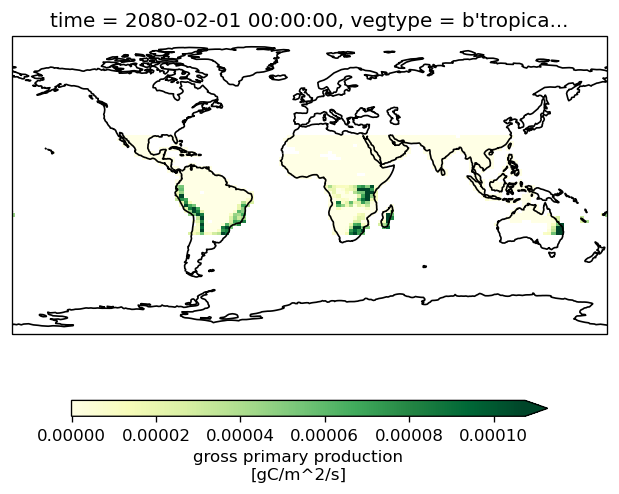

In [14]:
ax = setup_axes()
sparse_data.GPP.isel(vegtype=75, time=0).plot(robust=True, ax=ax, cbar_kwargs=cbar_kwargs)

##We construct a sparse.COO array by passing a list of non-zero data values and the coordinate locations for those values

In [ ]:
#in this case shape=(3,3), dtype=np.int64, and fill_value=0 are set by default
eye = sparse.COO(coords=[[0, 1, 2], [0, 1, 2]], data=[1, 1, 1])
eye
eye.todense() # identity matrix!

In [11]:
array = sparse.COO(
    coords=[[0, 1, 2], [0, 1, 2]],
    data=np.array([1, 1, 1], dtype=np.float32),
    shape=(4, 4),
    fill_value=np.nan,
)
array.todense()

array([[ 1., nan, nan, nan],
       [nan,  1., nan, nan],
       [nan, nan,  1., nan],
       [nan, nan, nan, nan]], dtype=float32)

In [12]:
import dask.array

dasky_array = dask.array.from_array(array, chunks=2)
dasky_array

dask.array<array, shape=(4, 4), dtype=float32, chunksize=(2, 2), chunktype=sparse.COO>

In [13]:
da = xr.DataArray(array, coords={"x": np.arange(4), "y": np.arange(4)})
da

Format,coo
Data Type,float32
Shape,"(4, 4)"
nnz,3
Density,0.1875
Read-only,True
Size,60
Storage ratio,0.9


In [14]:
da.data

Format,coo
Data Type,float32
Shape,"(4, 4)"
nnz,3
Density,0.1875
Read-only,True
Size,60
Storage ratio,0.9


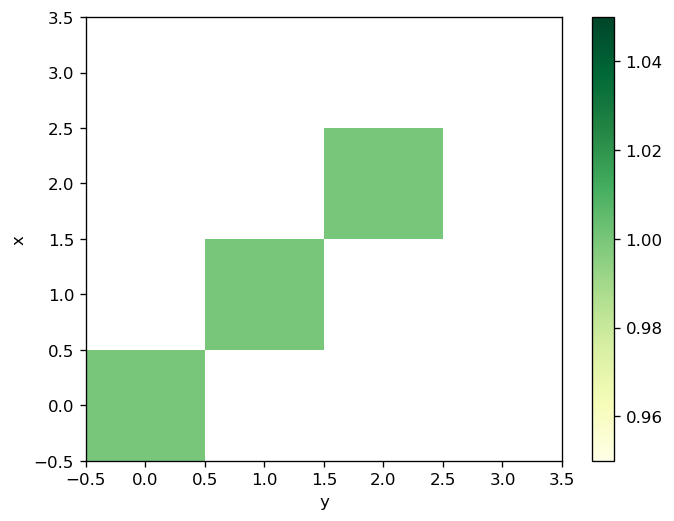

In [17]:
da.as_numpy()
da.to_numpy()
da.plot()

In [18]:
subset = data.GPP.isel(time=0).load()
subset

<xarray.DataArray 'GPP' (pft: 222182)>
array([ 0., nan, nan, ...,  0.,  0.,  0.])
Coordinates:
    time     object 2080-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     gross primary production
    units:         gC/m^2/s
    cell_methods:  time: mean

In [24]:
ixy = data.pfts1d_ixy.load().astype(int)
jxy = data.pfts1d_jxy.load().astype(int)
vegtype = data.pfts1d_itype_veg.load().astype(int)
vegtype.data

array([0, 1, 2, ..., 0, 0, 0])

In [20]:
coords = np.stack([vegtype, jxy - 1, ixy - 1], axis=0)
coords.shape

(3, 222182)

In [21]:
sparse_gpp = sparse.COO(
    coords=coords,
    data=subset.data,
    shape=(len(pftnames), data.sizes["lat"], data.sizes["lon"]),
    fill_value=np.nan,
)
sparse_gpp

Format,coo
Data Type,float64
Shape,"(79, 96, 144)"
nnz,199535
Density,0.18270829670651664
Read-only,True
Size,6.1M
Storage ratio,0.7


In [22]:
subset = data.GPP.isel(time=slice(12)).load()
subset

<xarray.DataArray 'GPP' (time: 1, pft: 222182)>
array([[ 0., nan, nan, ...,  0.,  0.,  0.]])
Coordinates:
  * time     (time) object 2080-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     gross primary production
    units:         gC/m^2/s
    cell_methods:  time: mean

In [23]:
def to_sparse(data, vegtype, jxy, ixy, shape):
    """
    Takes an input numpy array and converts it to a sparse array.

    Parameters
    ----------
    data: numpy.ndarray
        1D or 2D Data stored in compressed form.
    vegtype: numpy.ndarray

    jxy: numpy.ndarray
        Latitude index
    ixy: numpy.ndarray
        Longitude index
    shape: tuple
        Shape provided as sizes of (vegtype, jxy, ixy) in uncompressed
        form.

    Returns
    -------
    sparse.COO
        Sparse nD array
    """
    import sparse

    # This constructs a list of coordinate locations at which data exists
    # it works for arbitrary number of dimensions but assumes that the last dimension
    # is the "stacked" dimension i.e. "pft"
    if data.ndim == 1:
        coords = np.stack([vegtype, jxy - 1, ixy - 1], axis=0)
    elif data.ndim == 2:
        # generate some repeated time indexes
        # [0 0 0 ... 1 1 1... ]
        itime = np.repeat(np.arange(data.shape[0]), data.shape[1])
        # expand vegtype and friends for all time instants
        # by sequentially concatenating each array for each time instants
        tostack = [np.concatenate([array] * data.shape[0]) for array in [vegtype, jxy - 1, ixy - 1]]
        coords = np.stack([itime] + tostack, axis=0)
    else:
        raise NotImplementedError

    return sparse.COO(
        coords=coords,
        data=data.ravel(),
        shape=data.shape[:-1] + shape,
        fill_value=np.nan,
    )


# note vegcodes is already a numpy array
# we use .data to extract the underlying array from DataArrays  subset, vegtype, jxy, ixy
sparse_gpp = to_sparse(subset.data, vegtype.data, jxy.data, ixy.data, shape=(79, 192, 288))
sparse_gpp

Format,coo
Data Type,float64
Shape,"(1, 79, 192, 288)"
nnz,199535
Density,0.04567707417662916
Read-only,True
Size,7.6M
Storage ratio,0.2
